In [1]:
import numpy as np
import pandas as pd

# models
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# data manipulation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc

# plotting
import matplotlib.pyplot as plt
import seaborn as sns


#### Process Functions

In [2]:
# Draw the heatmap of training errors.
def draw_heatmap(errors, C_list, title):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(errors, annot=True, fmt='.3f', yticklabels=C_list, xticklabels=[])
    ax.collections[0].colorbar.set_label('error')
    ax.set(ylabel='C')
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.title(title)
    plt.show()

#### Dataset

In [3]:
np.random.seed(1)

In [4]:
adult_dataset = np.load('../data/adult_dataset.npy')
np.random.shuffle(adult_dataset)

In [5]:
X, y = adult_dataset[:, 0:-1], adult_dataset[:, -1]

#### Helper Functions

Logistic Regression

In [7]:
test_sizes = [0.8, 0.5, 0.2]
# test_sizes = [0.2] # for sanity checking process
splits = {}
for size in test_sizes:

    # getting the new split
    X_train, X_test, y_train, y_test = train_test_split(
        adult_dataset[:, 0:-1], adult_dataset[:, -1], 
        test_size=size, random_state=1
    )

    # define model
    model = LogisticRegression()

    # parameters to hypertune
    param_grid = {
        'C': np.linspace(0.001, 0.999, 10)
    }

    # cross validation to search for the best model hyperparameters
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=True, error_score='raise')
    grid_search.fit(X_train, y_train)
    splits[size] = grid_search


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [8]:
import math

In [91]:
splits

{0.8: GridSearchCV(cv=5, error_score='raise', estimator=SVC(),
              param_grid={'C': array([0.001])}, scoring='accuracy',
              verbose=True)}

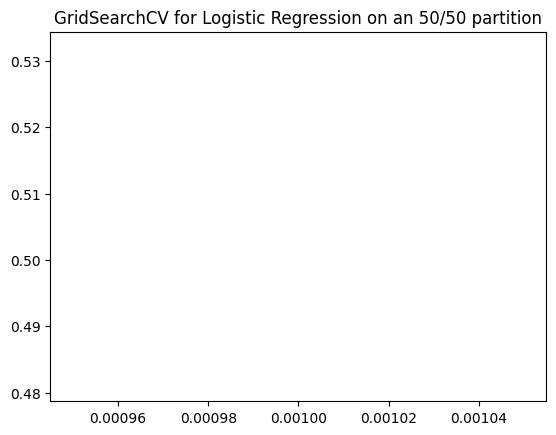

In [94]:
plt.title(f"GridSearchCV for Logistic Regression on an {math.ceil(100 * (1-size))}/{math.ceil(100 * size)} partition")
plt.plot(splits[0.8].cv_results_['param_C'].data, splits[0.8].cv_results_['mean_test_score'])
plt.show()

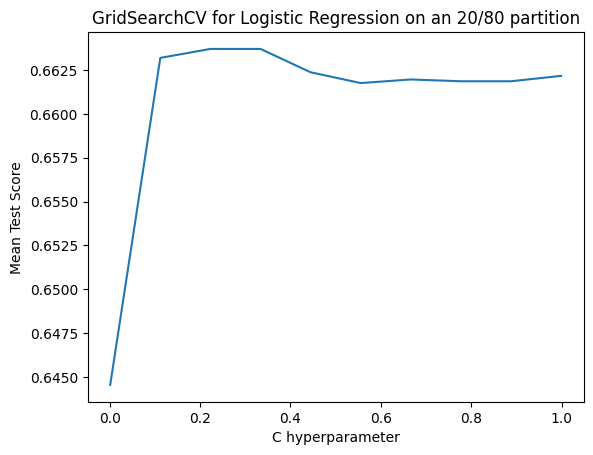

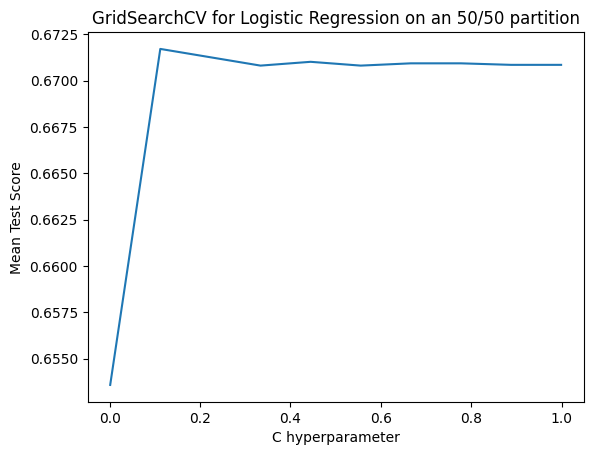

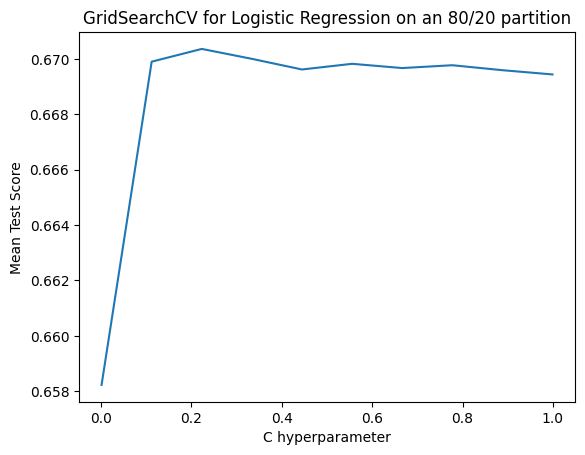

In [10]:
for size in test_sizes:
    plt.title(f"GridSearchCV for Logistic Regression on an {math.ceil(100 * (1-size))}/{math.ceil(100 * size)} partition")
    plt.plot(splits[size].cv_results_['param_C'].data, splits[size].cv_results_['mean_test_score'])
    plt.xlabel("C hyperparameter")
    plt.ylabel("Mean Test Score")
    plt.show()

In [17]:
for size in test_sizes:
    draw_heatmap(splits[size].cv_results_['mean_test_score'], splits[size].cv_results_['param_C'].data)

TypeError: draw_heatmap() missing 1 required positional argument: 'C_list'

In [11]:
# evaluating the results
print("Best Parameters:", grid_search.best_params_)
grid_search.cv_results_
# Access as a DataFrame
lr_df = pd.DataFrame(grid_search.cv_results_)

Best Parameters: {'C': 0.22277777777777777}


In [12]:
lr_df.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.109934,0.012101,0.002500,0.000625,0.001000,{'C': 0.001},0.661804,0.656046,0.660909,0.662785,0.649603,0.658229,0.004897,10
1,0.315035,0.046996,0.002739,0.000445,0.111889,{'C': 0.11188888888888888},0.671401,0.665131,0.667690,0.679166,0.666112,0.669900,0.005101,3
2,0.295515,0.034112,0.002544,0.000455,0.222778,{'C': 0.22277777777777777},0.670761,0.665131,0.669226,0.680445,0.666240,0.670361,0.005431,1
3,0.461818,0.080487,0.002797,0.000318,0.333667,{'C': 0.33366666666666667},0.670633,0.665387,0.668458,0.680317,0.665216,0.670002,0.005539,2
4,0.502276,0.060605,0.003179,0.000687,0.444556,{'C': 0.44455555555555554},0.669994,0.665003,0.668714,0.679550,0.664832,0.669619,0.005363,7


AUC Score: 0.73
Hyperparameters: {'C': 0.33366666666666667, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


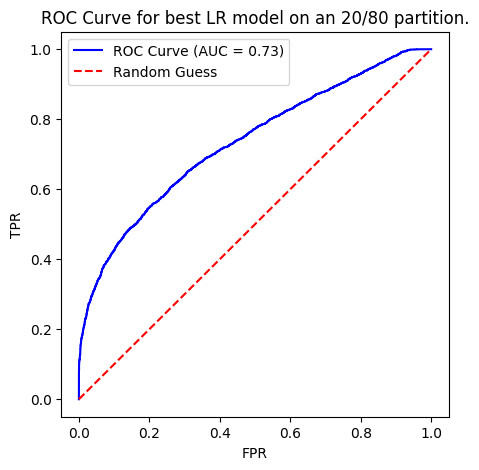

AUC Score: 0.74
Hyperparameters: {'C': 0.11188888888888888, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


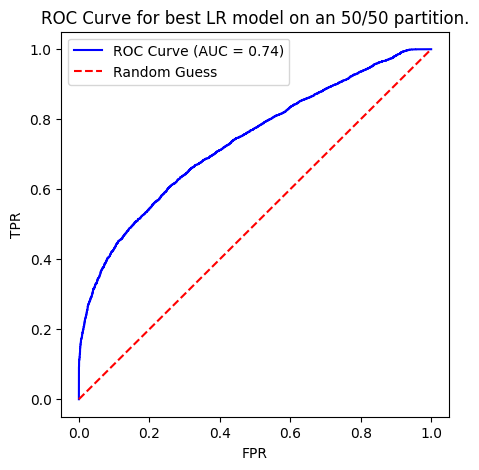

AUC Score: 0.74
Hyperparameters: {'C': 0.22277777777777777, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


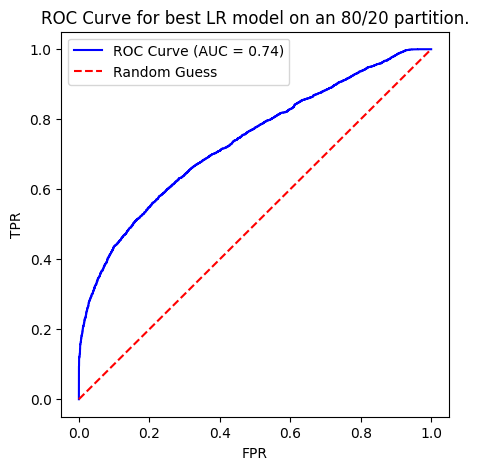

In [13]:
for size, val in splits.items():
    model = val.best_estimator_
    y_probs = model.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_probs)
    print(f"AUC Score: {auc_score:.2f}")
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='blue')
    plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(f'ROC Curve for best LR model on an {math.ceil(100 * (1-size))}/{math.ceil(100 * size)} partition.')
    print(f'Hyperparameters: {model.get_params()}')
    plt.legend()
    plt.show()

In [14]:
model = grid_search.best_estimator_
model.fit(X_train, y_train)

LogisticRegression(C=0.22277777777777777)

In [15]:
accuracy_score(y_test, model.predict(X_test))

0.6711024669874092

In [16]:
confusion_matrix(y_test, model.predict(X_test))

array([[3473, 1501],
       [1712, 3083]], dtype=int64)

AUC Score: 0.74
Hyperparameters: {'C': 0.12575, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


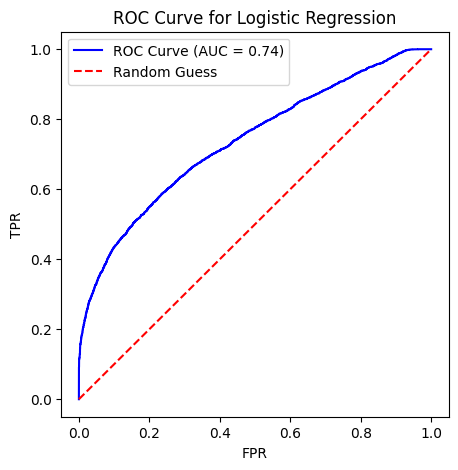

In [35]:
y_probs = model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_probs)
print(f"AUC Score: {auc_score:.2f}")
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for Logistic Regression')
print(f'Hyperparameters: {model.get_params()}')
plt.legend()
plt.show()

In [97]:
for size, grid_search in splits.items():
    print(f"{math.ceil(100 * (1-size))}/{math.ceil(100 * size)} Partition:")
    print(f"The best parameter(s) are {grid_search.best_params_}")
    print(f"The best cross validation accuracy is {grid_search.best_score_}")
    print(f"The final testing accuracy is {accuracy_score(y_test, grid_search.best_estimator_.fit(X_train, y_train).predict(X_test))}")
    print("===")
    

20/80 Partition:
The best parameter(s) are {'C': 0.001}
The best cross validation accuracy is 0.506551975518859
The final testing accuracy is 0.5901068752303346
===


In [127]:
X_train, X_test, y_train, y_test = train_test_split(
    adult_dataset[:, 0:-1], adult_dataset[:, -1], 
    test_size=0.2, random_state=1
)

SVM

XGBoost

In [128]:
xg_model = XGBClassifier(n_estimators=100, random_state=42)

In [129]:
(y_train + 1) / 2

array([0., 1., 1., ..., 0., 0., 0.])

In [136]:
y_train = (y_train + 1)/2
y_test = (y_test + 1)/2

In [137]:
xg_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [139]:
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")




Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Hyperparameters: {'colsample_bytree': 0.8, 'gamma': 0.2, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}
Test Accuracy: 0.6868666188965094


In [143]:
best_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

AUC Score: 0.75
Hyperparameters: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 100, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


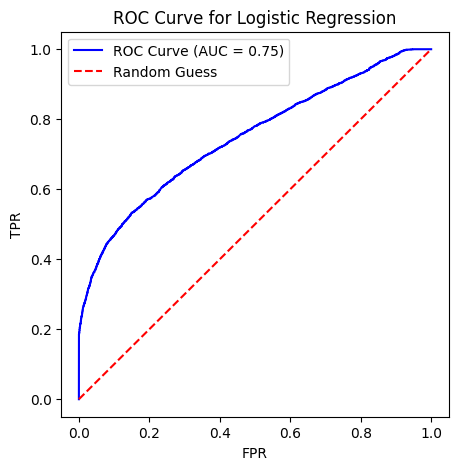

In [ ]:
y_probs = best_model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_probs)
print(f"AUC Score: {auc_score:.2f}")
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for Logistic Regression')
print(f'Hyperparameters: {model.get_params()}')
plt.legend()
plt.show()

In [141]:
accuracy_score(y_test, xg_model.predict(X_test))

0.684512232572423

KNN

In [145]:
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm used to compute nearest neighbors
    'leaf_size': [20, 30, 40],  # Leaf size passed to BallTree or KDTree
    'p': [1, 2]  # Power parameter for the Minkowski distance (1 for Manhattan, 2 for Euclidean)
}

grid_search = GridSearchCV(estimator=knn,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_knn = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")


Fitting 5 folds for each of 240 candidates, totalling 1200 fits


KeyboardInterrupt: 

Random Forest

In [132]:
from sklearn.ensemble import RandomForestClassifier

In [133]:
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)

In [134]:
rf_classifier.fit(X_train, (y_train + 1) / 2)

RandomForestClassifier(n_estimators=50, random_state=42)

In [135]:
accuracy_score((y_test + 1)/2, rf_classifier.predict(X_test))

0.6583068891391135